# Tratamento de dados 

In [1]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


# Renomeando colunas

In [2]:
to_rename = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
data = data.rename(columns = to_rename)
data.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


# Usando swapper de valores pra criar coluna mais coerente

In [3]:
swapper = {
    0:1,
    1:0
}
data['finalizado'] = data.nao_finalizado.map(swapper)
data.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
data.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


# Usando Seaborn pra plotar e comparar resultados

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

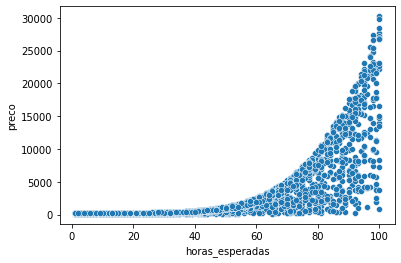

In [5]:
import seaborn as sns
sns.scatterplot(x="horas_esperadas", y="preco", data=data)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

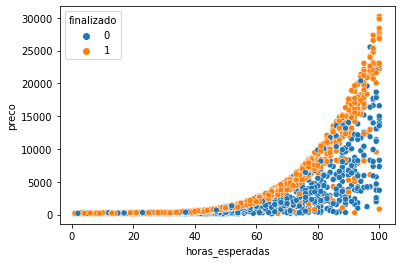

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco", hue='finalizado', data=data)

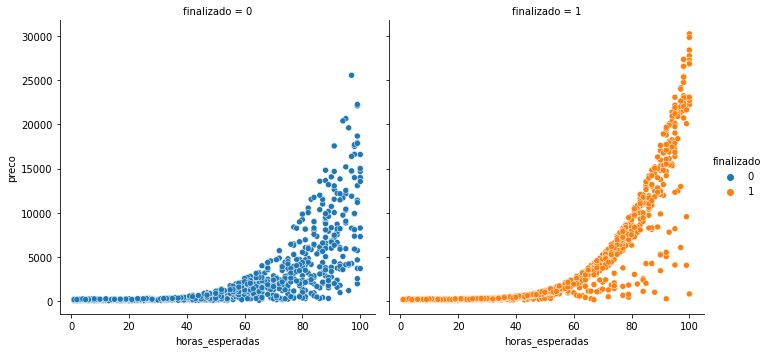

In [7]:
sns.relplot(x="horas_esperadas", y="preco", hue='finalizado', col='finalizado', data=data)

 # Reaproveitando treinamento do notebook anterior

In [8]:
x = data[['horas_esperadas', 'preco']]
y = data['finalizado']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 4
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x , y, test_size = 0.25, stratify = y)

print(f'Número de elementos: train_X - {len(train_x)}, train_Y - {len(train_y)}  test_X - {len(test_x)}, test_Y - {len(test_y)}')
print()
model = LinearSVC()
model.fit(train_x, train_y)

predict = model.predict(test_x)
acc = accuracy_score(test_y,predict) * 100
print(f'A precisão foi de {round(acc,2)}%')

Número de elementos: train_X - 1617, train_Y - 1617  test_X - 540, test_Y - 540

A precisão foi de 47.41%


C:\Users\W10\Anaconda3\envs\py36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# A importância de uma baseline

In [10]:
linha_base = np.ones(540)

In [11]:
acc = accuracy_score(test_y,linha_base) * 100
print(f'A precisão  da baseline foi de {round(acc,2)}%')

A precisão  da baseline foi de 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

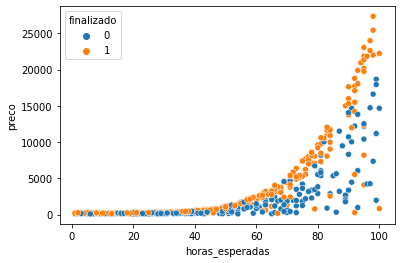

In [12]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=test_y, data=test_x)

In [13]:
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 27343


In [14]:
pixels = 100
new_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
new_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [15]:
xx, yy  = np.meshgrid(new_x, new_y)
xx.ravel()[:110] #concatena os cara

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01,  1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,
        8.92,  9.91])

In [16]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.707057e+04],
       [9.802000e+01, 2.707057e+04],
       [9.901000e+01, 2.707057e+04]])

In [17]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
print(Z.reshape(xx.shape))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Decision Boundary - A borda de decisão do algoritmo

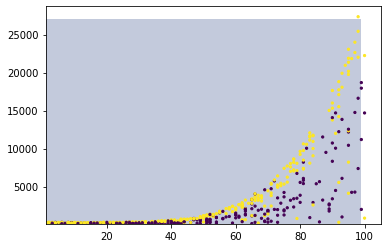

In [18]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=5)

# Usando o SVC

Número de elementos: train_X - 1617, train_Y - 1617  test_X - 540, test_Y - 540

A precisão foi de 56.67%
A precisão  da baseline foi de 52.59%
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


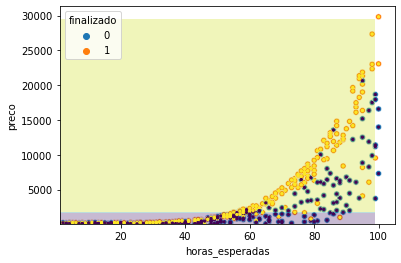

In [24]:
x = data[['horas_esperadas', 'preco']]
y = data['finalizado']
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 10
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x , y, test_size = 0.25, stratify = y)

print(f'Número de elementos: train_X - {len(train_x)}, train_Y - {len(train_y)}  test_X - {len(test_x)}, test_Y - {len(test_y)}')
print()
model = SVC()
model.fit(train_x, train_y)

predict = model.predict(test_x)
acc = accuracy_score(test_y,predict) * 100
print(f'A precisão foi de {round(acc,2)}%')
linha_base = np.ones(540)
acc = accuracy_score(test_y,linha_base) * 100
print(f'A precisão  da baseline foi de {round(acc,2)}%')

sns.scatterplot(x="horas_esperadas", y="preco", hue=test_y, data=test_x)

x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()

pixels = 100
new_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
new_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy  = np.meshgrid(new_x, new_y)
xx.ravel()[:110] #concatena os cara
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
print(Z.reshape(xx.shape))

import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=5)

# Usando scaler

Número de elementos: train_X - 1617, train_Y - 1617  test_X - 540, test_Y - 540

A precisão foi de 70.37%
A precisão  da baseline foi de 52.59%
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


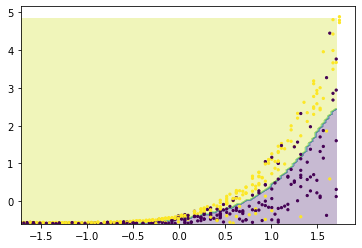

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x , y, test_size = 0.25, stratify = y)

print(f'Número de elementos: train_X - {len(train_x)}, train_Y - {len(train_y)}  test_X - {len(test_x)}, test_Y - {len(test_y)}')
print()
model = SVC()
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)
model.fit(train_x, train_y)

predict = model.predict(test_x)
acc = accuracy_score(test_y,predict) * 100
print(f'A precisão foi de {round(acc,2)}%')
linha_base = np.ones(540)
acc = accuracy_score(test_y,linha_base) * 100
print(f'A precisão  da baseline foi de {round(acc,2)}%')

data_x = test_x[:,0]
data_y = test_x[:,1]
pixels = 100

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

new_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
new_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy  = np.meshgrid(new_x, new_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
print(Z.reshape(xx.shape))
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c=test_y, s=5)